In [56]:

import sys
import glob
import os
import re
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

In [108]:
def read_trace(filename):
    of = open(filename)
    throughput = float(of.readline().strip())
    percents, latencies = [], []
    for cdf_line in of.readlines():
        cdf_line = cdf_line.split(",")
        latency = long(cdf_line[0].strip())
        percent = float(cdf_line[1].strip())
        percents.append(percent)
        latencies.append(latency / 1000.0)
    df = pd.DataFrame({'pct': percents, 'lat': latencies})
    return throughput, df

In [109]:
def read_traces(filenames):
    iopss = []
    dfs = []
    for filename in filenames:
        iops, df = read_trace(filename)
        iopss.append(iops)
        dfs.append(df)
    print sum(iopss), iopss
    return iopss, dfs

6651524.47026 6651524.47026
49662.564282 [29667.386054, 19995.178228]
5130857.77285 [502736.813975, 4628120.958871]
4775518.35006 [2796414.253557, 1979104.096501]
3054914.74883 [1488923.781129, 1565990.967701]
1156243.17583 [551878.146192, 604365.029635]
297017.542268 [143273.014234, 153744.528034]
44186.823779 [20672.41524, 23514.408539]


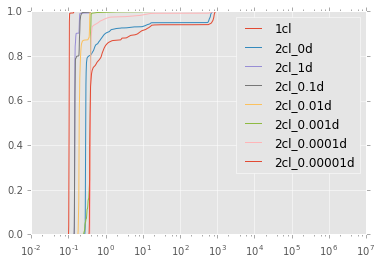

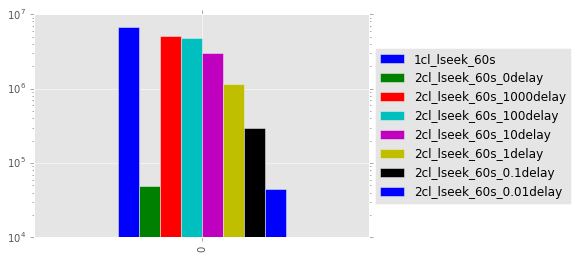

In [115]:
iops_df = pd.DataFrame({})
fig, ax = plt.subplots()
ax.set_xscale('log')


###
iops, cdf = read_trace('1cl_lseek_60s.csv')
iops_df['1cl_lseek_60s'] = [iops]
ax.plot(cdf.lat, cdf.pct, label='1cl')
print iops, iops

###
iops, cdfs = read_traces(glob.glob('2cl_*_0delay.csv'))
iops_df['2cl_lseek_60s_0delay'] = [sum(iops)]
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0d')

###
#iops, cdfs = read_traces(glob.glob('2cl_*_2000delay.csv'))
#iops_df['2cl_lseek_60s_2000delay'] = [sum(iops)]
#ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_2d')

###
iops, cdfs = read_traces(glob.glob('2cl_*_1000delay.csv'))
iops_df['2cl_lseek_60s_1000delay'] = [sum(iops)]
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_1d')

###
#iops, cdfs = read_traces(glob.glob('2cl_*_500delay.csv'))
#iops_df['2cl_lseek_60s_500delay'] = [sum(iops)]
#ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.5d')

###
#iops, cdfs = read_traces(glob.glob('2cl_*_250delay.csv'))
#iops_df['2cl_lseek_60s_250delay'] = [sum(iops)]
#ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.25d')

###
#iops, cdfs = read_traces(glob.glob('2cl_*_125delay.csv'))
#iops_df['2cl_lseek_60s_125delay'] = [sum(iops)]
#ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.125d')

###
iops, cdfs = read_traces(glob.glob('2cl_*_100delay.csv'))
iops_df['2cl_lseek_60s_100delay'] = [sum(iops)]
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.1d')

###
iops, cdfs = read_traces(glob.glob('2cl_*_10delay.csv'))
iops_df['2cl_lseek_60s_10delay'] = [sum(iops)]
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.01d')

###
iops, cdfs = read_traces(glob.glob('2cl_*_1delay.csv'))
iops_df['2cl_lseek_60s_1delay'] = [sum(iops)]
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.001d')

###
iops, cdfs = read_traces(glob.glob('2cl_*_0.1delay.csv'))
iops_df['2cl_lseek_60s_0.1delay'] = [sum(iops)]
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.0001d')

###
iops, cdfs = read_traces(glob.glob('2cl_*_0.01delay.csv'))
iops_df['2cl_lseek_60s_0.01delay'] = [sum(iops)]
ax.plot(cdfs[0].lat, cdfs[0].pct, label='2cl_0.00001d')
ax.legend()

###
ax = iops_df.plot.bar(logy=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))